In [1]:
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
#model reconstruction from JSON file
with open('../Image-CNN/model_architecture.json', 'r') as m:
    model = model_from_json(m.read())

W0707 17:00:55.441173 140125089158976 deprecation_wrapper.py:119] From /home/divyam/Desktop/GitFiles/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 17:00:55.465430 140125089158976 deprecation_wrapper.py:119] From /home/divyam/Desktop/GitFiles/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 17:00:55.497323 140125089158976 deprecation_wrapper.py:119] From /home/divyam/Desktop/GitFiles/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0707 17:00:55.555042 140125089158976 deprecation_wrapper.py:119] From /home/divyam/Desktop/GitFiles/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_de

In [3]:
model.load_weights('model_weights.h5')

W0707 17:01:00.749336 140125089158976 deprecation_wrapper.py:119] From /home/divyam/Desktop/GitFiles/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [4]:
model.layers

In [5]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d_1',
    'trainable': True,
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format': 'channels_last'}},
  {'cla

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
__________

In [7]:
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt
dim1 = dim2 = 256

In [8]:
imgPath = './input/natural_images/testing/PAL-Fleet-Page316x210pxB777.jpg'

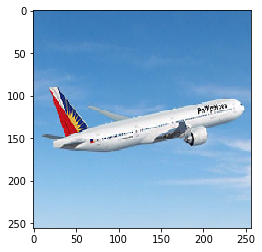

In [9]:
img = image.load_img(imgPath, target_size=(dim1, dim2))
plt.imshow(img)

In [10]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img

array([[[[ 62., 122., 182.],
         [ 63., 123., 183.],
         [ 65., 125., 185.],
         ...,
         [ 62., 122., 184.],
         [ 62., 122., 184.],
         [ 61., 121., 183.]],

        [[ 63., 123., 183.],
         [ 63., 123., 183.],
         [ 64., 124., 184.],
         ...,
         [ 62., 122., 184.],
         [ 61., 121., 183.],
         [ 61., 121., 183.]],

        [[ 64., 124., 184.],
         [ 64., 124., 184.],
         [ 64., 124., 184.],
         ...,
         [ 62., 122., 184.],
         [ 61., 121., 183.],
         [ 61., 121., 183.]],

        ...,

        [[180., 211., 239.],
         [180., 211., 239.],
         [180., 211., 239.],
         ...,
         [180., 210., 234.],
         [180., 210., 234.],
         [180., 210., 234.]],

        [[182., 212., 238.],
         [181., 211., 237.],
         [180., 210., 236.],
         ...,
         [183., 213., 237.],
         [181., 211., 235.],
         [181., 211., 235.]],

        [[182., 212., 238.],
       

In [11]:
img.shape

(1, 256, 256, 3)

In [12]:
#indices
'''

    airplane: 0,
    car: 1,
    cat: 2,
    dog: 3,
    flower: 4,
    fruit: 5,
    motorbike: 6,
    person: 7
    
'''

'\n\n    airplane: 0,\n    car: 1,\n    cat: 2,\n    dog: 3,\n    flower: 4,\n    fruit: 5,\n    motorbike: 6,\n    person: 7\n    \n'

In [13]:
result = model.predict(img)
result

array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
img_class = model.predict_classes(img)
img_class

array([0])

In [15]:
# according to indices "0" is given to airplanes and predicted array is airplane

In [16]:
imgPath2 = './input/natural_images/testing/plant-flower-macro-87840.jpg'

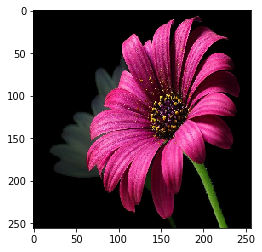

In [17]:
img1 = image.load_img(imgPath2, target_size=(dim1, dim2))
plt.imshow(img1)

In [18]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1.shape

(1, 256, 256, 3)

In [19]:
result = model.predict(img1)
img_class = model.predict_classes(img1)
print('Result: ', result, ' Class: ', img_class)

Result:  [[0. 0. 0. 0. 1. 0. 0. 0.]]  Class:  [4]


In [20]:
# according to indices "4" is given to flowers and predicted array is flower